<a href="https://colab.research.google.com/github/Elwing-Chou/tiba0619/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import keras -> import tensorflow.keras

tensorflow2: 1. 整合keras 2. (?)gpu整合

In [1]:
from tensorflow.keras.datasets import mnist
# ((nparray:x_train, nparray:y_train), (nparray:x_test, nparray:y_test))
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
import pandas as pd
# 0: 黑 255: 白
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


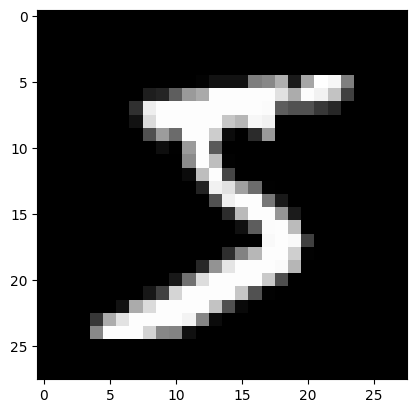

In [3]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
plt.imshow(x_train[0], cmap="gray")

In [4]:
# 你可以試試看用x_test話個tsne
import numpy as np
x_train_1d = x_train.reshape(-1, 784)
x_test_1d = x_test.reshape(-1, 784)
print(x_train_1d.shape)
print(x_test_1d.shape)

(60000, 784)
(10000, 784)


In [5]:
# 1. Model 2. Layer
from tensorflow.keras.models import Sequential
# 稠密層/全連接層(Fully-Connected)
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 輸出一個: 0.6 (0.6 0.4) BinaryCrossentropy p1 log(1/0.6) + p2 log(1/0.4)
# 輸出10個: CategoricalCrossentropy sigma pi log1/qi
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       metrics=["accuracy"])

In [8]:
x_train_1d_norm = x_train_1d / 255.0
x_test_1d_norm = x_test_1d / 255.0

In [9]:
from tensorflow.keras.utils import to_categorical
y_train_1hot = to_categorical(y_train, num_classes=10)
y_test_1hot = to_categorical(y_test, num_classes=10)

一開始什麼都沒改: 6 round(30 epochs): 180 epoch

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
# 30 epochs: (54000 / 200) * 30
model.fit(x_train_1d_norm,
     y_train_1hot,
     batch_size=200,
     epochs=100,
     validation_split=0.1,
     callbacks=c)

Epoch 1/30
270/270 [==============================] - 6s 4ms/step - loss: 0.3928 - accuracy: 0.8939 - val_loss: 0.1888 - val_accuracy: 0.9483
Epoch 2/30
270/270 [==============================] - 1s 4ms/step - loss: 0.1933 - accuracy: 0.9454 - val_loss: 0.1317 - val_accuracy: 0.9645
Epoch 3/30
270/270 [==============================] - 1s 3ms/step - loss: 0.1412 - accuracy: 0.9596 - val_loss: 0.1122 - val_accuracy: 0.9677
Epoch 4/30
270/270 [==============================] - 1s 3ms/step - loss: 0.1110 - accuracy: 0.9681 - val_loss: 0.0926 - val_accuracy: 0.9728
Epoch 5/30
270/270 [==============================] - 1s 4ms/step - loss: 0.0904 - accuracy: 0.9733 - val_loss: 0.0868 - val_accuracy: 0.9740
Epoch 6/30
270/270 [==============================] - 1s 4ms/step - loss: 0.0763 - accuracy: 0.9781 - val_loss: 0.0790 - val_accuracy: 0.9770
Epoch 7/30
270/270 [==============================] - 1s 5ms/step - loss: 0.0647 - accuracy: 0.9810 - val_loss: 0.0798 - val_accuracy: 0.9752
Epoch 

In [11]:
model.evaluate(x_test_1d_norm, y_test_1hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9794


[0.06790520995855331, 0.9793999791145325]

In [19]:
pre = model.predict(x_test_1d_norm).argmax(axis=-1)
pre

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [17]:
n = np.array([
    [1, 2],
    [3, 4],
    [6, 5]
])
# [1, 2, 3, 4, 6, 5]
n.argmax()
# 上往下看 [1, 3, 6] [2, 4, 5]
n.argmax(axis=0)
# 左往右看 [1, 2] [3, 4] [6, 5]
# axis=-1
n.argmax(axis=1)

array([1, 1, 0])